<a href="https://www.kaggle.com/code/bitanbiswas99/interview-extraction-and-analysis?scriptVersionId=95691739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install PyQt5

     |████████████████████████████████| 8.3 MB 554 kB/s            
     |████████████████████████████████| 59.9 MB 2.2 MB/s             
     |████████████████████████████████| 338 kB 23.9 MB/s            


In [3]:
!pip install Wave moviepy SpeechRecognition

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 388 kB 876 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 32.8 MB 4.2 MB/s             
     |████████████████████████████████| 26.9 MB 2.5 MB/s             
  Created wheel for Wave: filename=Wave-0.0.2-py3-none-any.whl size=1239 sha256=3f61e0b7fa4907c26427aa32adce499099afe61622a35cf55f92cdd890f69735
  Stored in directory: /root/.cache/pip/wheels/25/e8/fe/458c7dac00c6abedad6380b9d0ef1a5cbc7c21807df1d30915
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110744 sha256=bfa2f9dce5e9aab2434c4876c51b9f6fbbc2a493691cd798f82e10f6cb479665
  Stored in directory: /root/.cache/pip/wheels/56/dc/2b/9cd600d483c04af3353d66623056fc03faed76b7518faae4df
Successfully built Wave moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.0
    Uninstalling decorator-5.1.0:
      Successfully uninstalled decorator-5.1.0
ER

In [4]:
import wave, math, contextlib
import speech_recognition as sr
from moviepy.editor import AudioFileClip

In [5]:
#print(os.listdir('../input'))

In [6]:
transcribed_audio_file_name = "transcribed_speech.wav"
zoom_video_file_name = "../input/tellmeabout/How to answer _Tell Me About Yourself__.mp4"

In [7]:
audioclip = AudioFileClip(zoom_video_file_name)
audioclip.write_audiofile(transcribed_audio_file_name)

MoviePy - Writing audio in transcribed_speech.wav


MoviePy - Done.


In [8]:
with contextlib.closing(wave.open(transcribed_audio_file_name,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)

In [9]:
total_duration = math.ceil(duration / 60)

In [10]:
total_duration

5

In [11]:
r = sr.Recognizer()

In [12]:
audioclip

In [13]:
def startConvertion(path = 'sample.wav',lang = 'en-IN'):
    with sr.AudioFile(path) as source:
        print('Fetching File')
        audio_text = r.listen(source,timeout=180, phrase_time_limit=180)
        # recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
        try:
        
            # using google speech recognition
            print('Converting audio transcripts into text ...')
            text = r.recognize_google(audio_text)
            print(text)
            return text
    
        except:
            print('Sorry.. run again...')

In [14]:
startConvertion(transcribed_audio_file_name)

Fetching File
Converting audio transcripts into text ...
it is a safe that this will be one of the first questions you will face and the way Westwood will set the tone for the entire interview one thing that stays true for this answer every time you are asked keep it professional employers are not asking you this question because they want to know what your favourite colour is they want to know why you are the best candidate for the job employers want to hire the best person for the job and your job is to convince them this is you as it is most likely the first question you will face in your interview it is one of the first impressions will be giving the employer you want to give the most professional image of yourself as possible in order to accomplish this do not volunteer your personal information please tell me about yourself I was born I have two dogs and I love people you don't want to give any information about your personal life but rather your professional life and how it rela

"it is a safe that this will be one of the first questions you will face and the way Westwood will set the tone for the entire interview one thing that stays true for this answer every time you are asked keep it professional employers are not asking you this question because they want to know what your favourite colour is they want to know why you are the best candidate for the job employers want to hire the best person for the job and your job is to convince them this is you as it is most likely the first question you will face in your interview it is one of the first impressions will be giving the employer you want to give the most professional image of yourself as possible in order to accomplish this do not volunteer your personal information please tell me about yourself I was born I have two dogs and I love people you don't want to give any information about your personal life but rather your professional life and how it relates to the position your interview went for to do the su

In [15]:
with open('transcription.txt', 'w') as f:
    print(f.write(startConvertion(transcribed_audio_file_name)))

Fetching File
Converting audio transcripts into text ...
it is a safe that this will be one of the first questions you will face and the way Westwood will set the tone for the entire interview one thing that stays true for this answer every time you are asked keep it professional employers are not asking you this question because they want to know what your favourite colour is they want to know why you are the best candidate for the job employers want to hire the best person for the job and your job is to convince them this is you as it is most likely the first question you will face in your interview it is one of the first impressions will be giving the employer you want to give the most professional image of yourself as possible in order to accomplish this do not volunteer your personal information please tell me about yourself I was born I have two dogs and I love people you don't want to give any information about your personal life but rather your professional life and how it rela

In [16]:
with open('transcription.txt', 'r') as f:
    text=f.read()

In [17]:
!pip install ecco
import ecco

lm = ecco.from_pretrained('t5-small')
review=text[0:512]

output = lm.generate(f"sst2 sentence: {review}", generate=1, do_sample=False)

     |████████████████████████████████| 70 kB 557 kB/s            
     |████████████████████████████████| 22.3 MB 158 kB/s            
     |████████████████████████████████| 1.4 MB 16.9 MB/s            
     |████████████████████████████████| 636 kB 19.1 MB/s            
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotl

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
review2=text[512:1024]

output2 = lm.generate(f"sst2 sentence: {review}", generate=1, do_sample=False)

In [18]:
import ecco
lm = ecco.from_pretrained('t5-small', verbose=False)

output = lm.generate(f"sst2 sentence: {review}", generate=1, do_sample=False, attribution=['ig'])
output.primary_attributions(attr_method='ig', ignore_tokens=[0,1,2,3,4,5,6,43,44])

<IPython.core.display.Javascript object>

In [24]:
output2 = lm.generate(f"sst2 sentence: {review2}", generate=1, do_sample=False, attribution=['ig'])
output2.primary_attributions(attr_method='ig', ignore_tokens=[0,1,2,3,4,5,6,43,44])

<IPython.core.display.Javascript object>

In [26]:
for i in range((len(text)//512)-1):
    
    review=text[(i*512):((i+1)*512)]
    output = lm.generate(f"sst2 sentence: {review}", generate=1, do_sample=False,attribution=['ig'])
    output.primary_attributions(attr_method='ig', ignore_tokens=[0,1,2,3,4,5,6,43,44])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

sent          = TextBlob(text)
# The polarity score is a float within the range [-1.0, 1.0]
# where negative value indicates negative text and positive
# value indicates that the given text is positive.
polarity      = sent.sentiment.polarity
# The subjectivity is a float within the range [0.0, 1.0] where
# 0.0 is very objective and 1.0 is very subjective.
subjectivity  = sent.sentiment.subjectivity

sent          = TextBlob(text, analyzer = NaiveBayesAnalyzer())
classification= sent.sentiment.classification
positive      = sent.sentiment.p_pos
negative      = sent.sentiment.p_neg

print(polarity,subjectivity,classification,positive,negative)

0.2523096821877309 0.3953547671840354 pos 0.9999998727517143 1.272482723869303e-07


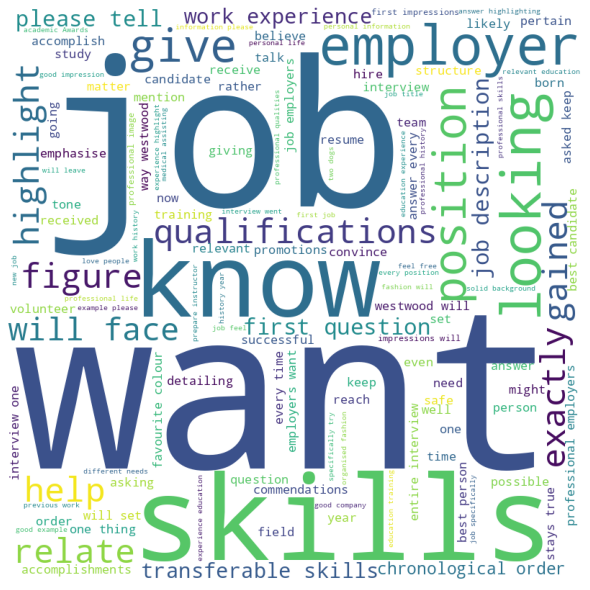

In [28]:
import matplotlib
import pandas
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
val = str(text)

# split the value
tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [32]:
#no.of words per minute
#total_duration=5
word_count_tex=len(text.split(" "))/(total_duration/2);
print("Words per minute are:",word_count_tex)

Words per minute are: 198.0
